# Titanic Dataset Analysis
**Author:** Trent Rueckert  
**Date:** March 21, 2025  
**Objective:** Analyze the Titanic dataset to predict survival based on various input features.

## Introduction
In this notebook, I will analyze the Titanic dataset to predict survival by preparing/exploring the data, cleaning the data/handling missing values, performing feature engineering, and training machine learning models based on different selected features.

## Imports
Import the necessary libraries with the code below.

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Section 1. Import the Data

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation
### 2.1 Handle Missing Values and Clean Data

In [ ]:
# Impute missing values for age using the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

C:\Users\trent\AppData\Local\Temp\ipykernel_24204\1755533677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [4]:
# Fill in missing values for embark_town using the mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\trent\AppData\Local\Temp\ipykernel_24204\3297650596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


### 2.2 Feature Engineering
Create new features:

* Add family_size - number of family members on board
* Convert categorical "sex" to numeric
* Convert categorical "embarked" to numeric
* Binary feature - convert "alone" to numeric

In [5]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification
### 3.1 Choose Features and Target

* Select two or more input features (numerical for regression, numerical and/or categorical for classification)
* Use survived as the target. 
* We will do three input cases like the example. 

First:
* input features: alone
* target: survived
  
Second:
* input features - age (or another variable of your choice)
* target: survived

Third:
* input features -  age and family_size (or another combination of your choice)
* target: survived

### 3.2 Define X (features) and y (target)
* Assign input features to X a pandas DataFrame with 1 or more input features
* Assign target variable to y (as applicable) - a pandas Series with a single target feature
* Again - use comments to run a single case at a time
* The follow starts with only the statements needed for case 1. 
* Double brackets [[ ]]]  makes a 2D DataFrame
* Single brackets [ ]  make a 1D Series

In [ ]:
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

### Reflection 3:

Why are these features selected?
* These features are selected because age and family_size have a high impact on survival

Are there features that are likely to be highly predictive of survival?
* Yes, pclass, fare, and sex area also likely to be highly predictive of survival

## Section 4. Train a Classification Model (Decision Tree)
### 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [9]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [11]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance
Evaluate model performance on training data:

In [12]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



Evaluate model performance on test data:

In [13]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix:

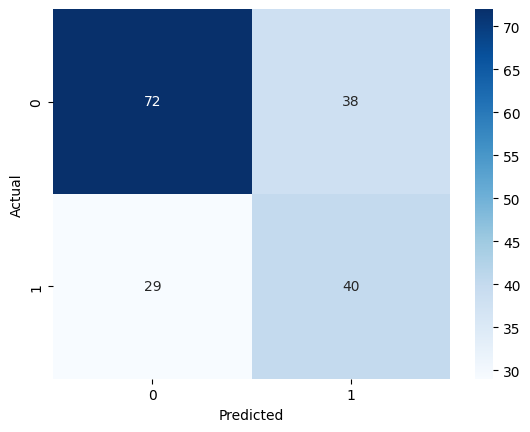

In [15]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot
Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

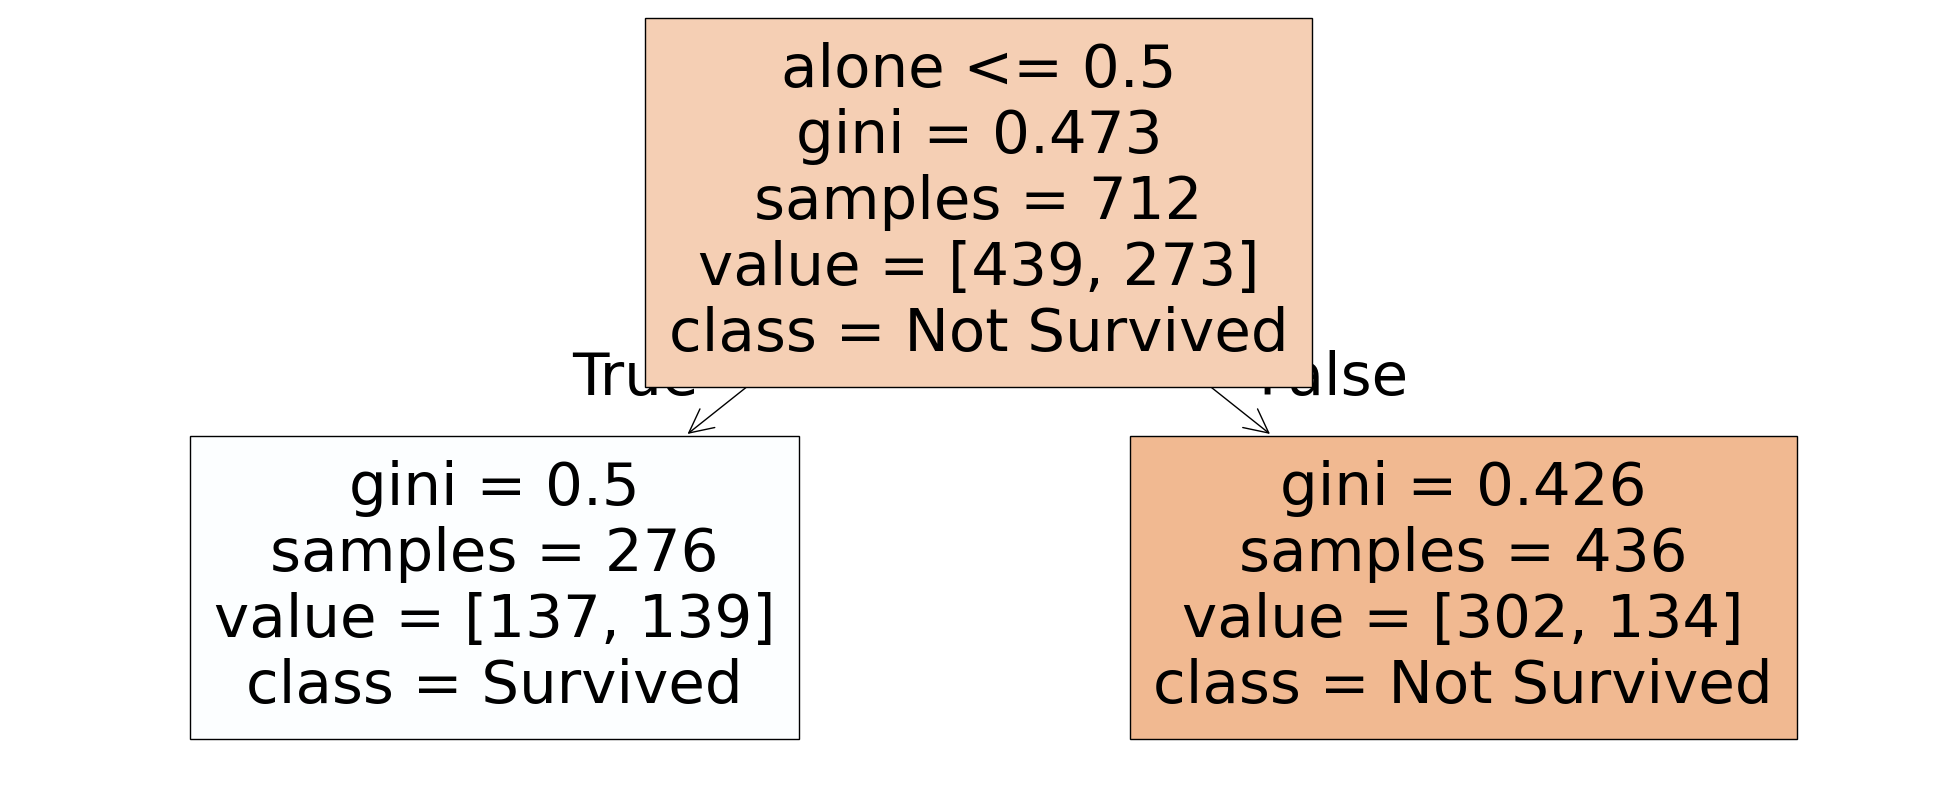

In [17]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.6 Repeat for Case 2
X2 and y2 will be used instead of commenting out code

In [25]:
# Split the data into training and test sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

Train size:  712 Test size:  179


In [20]:
# Create and train a decision tree model with no random initializer argument
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [21]:
# Predict and evaluate training data (X2 train)
y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



In [22]:
# Predict and evaluate test data
y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



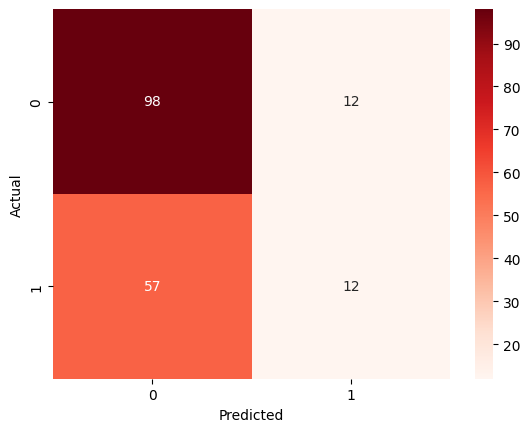

In [23]:
# Plot a confusion matrix
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

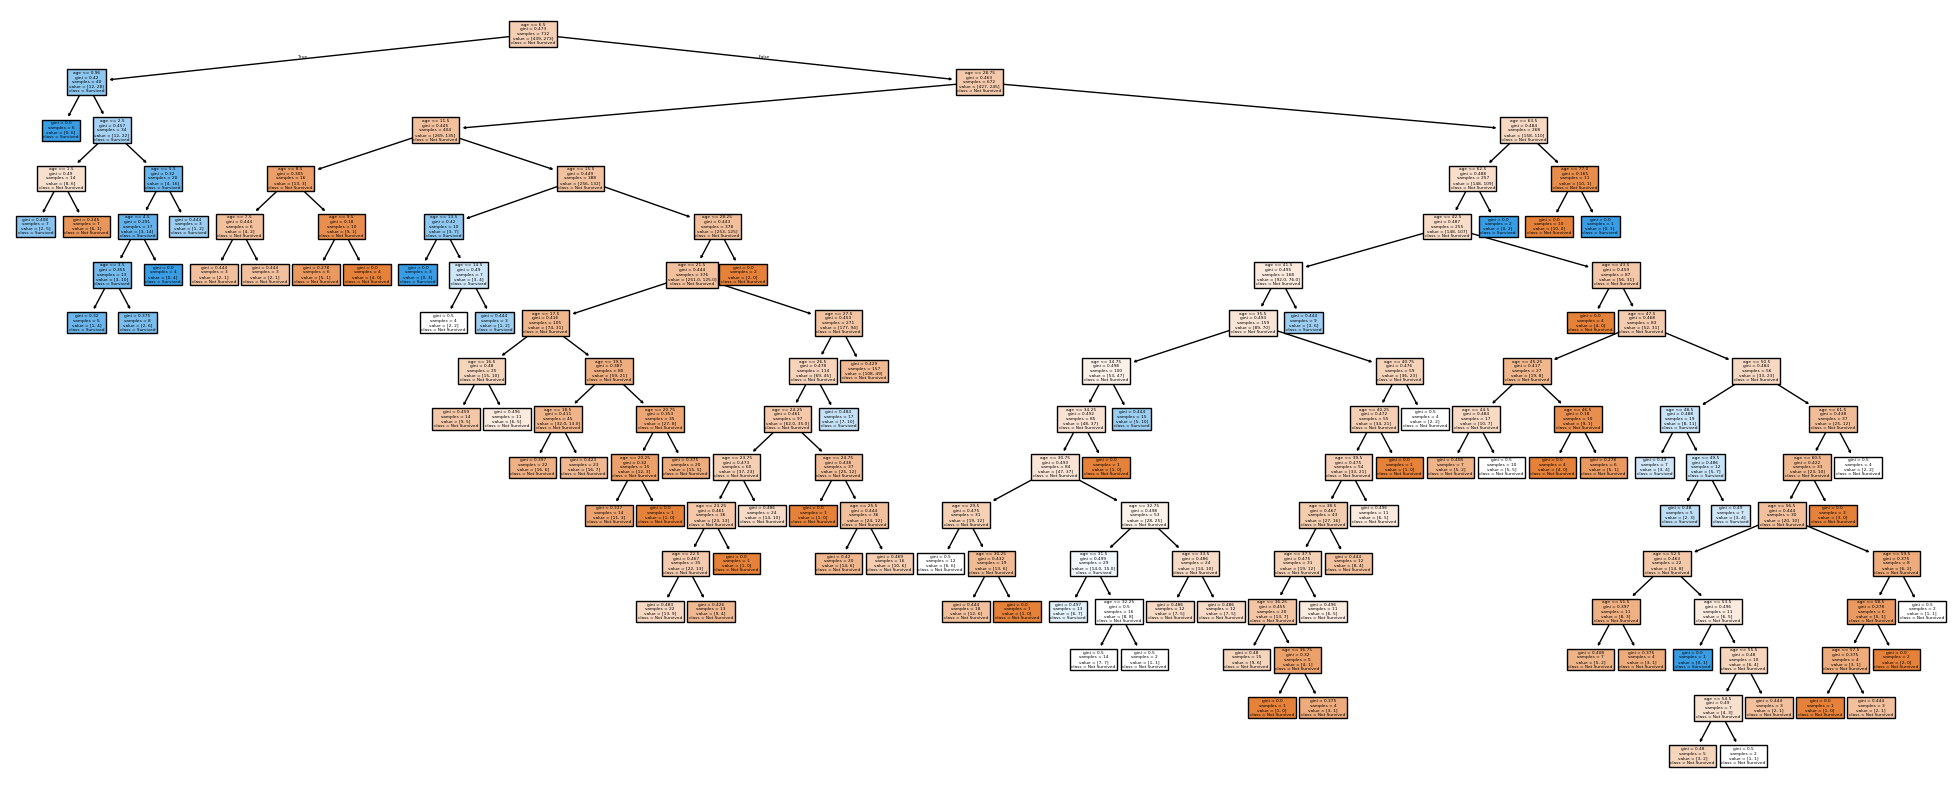

In [24]:
# Plot the decision tree model
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

### 4.7 Repeat for Case 3
X3 and y3 will be used instead of commenting out code

In [26]:
# Split the data into training and test sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

Train size:  712 Test size:  179


In [27]:
# Create and train a decision tree model with no random initializer argument
tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [28]:
# Predict and evaluate training data (X3 train)
y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [29]:
# Predict and evaluate test data
y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



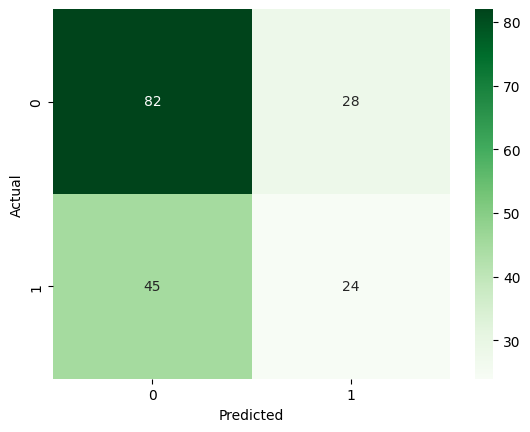

In [30]:
# Plot a confusion matrix
cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

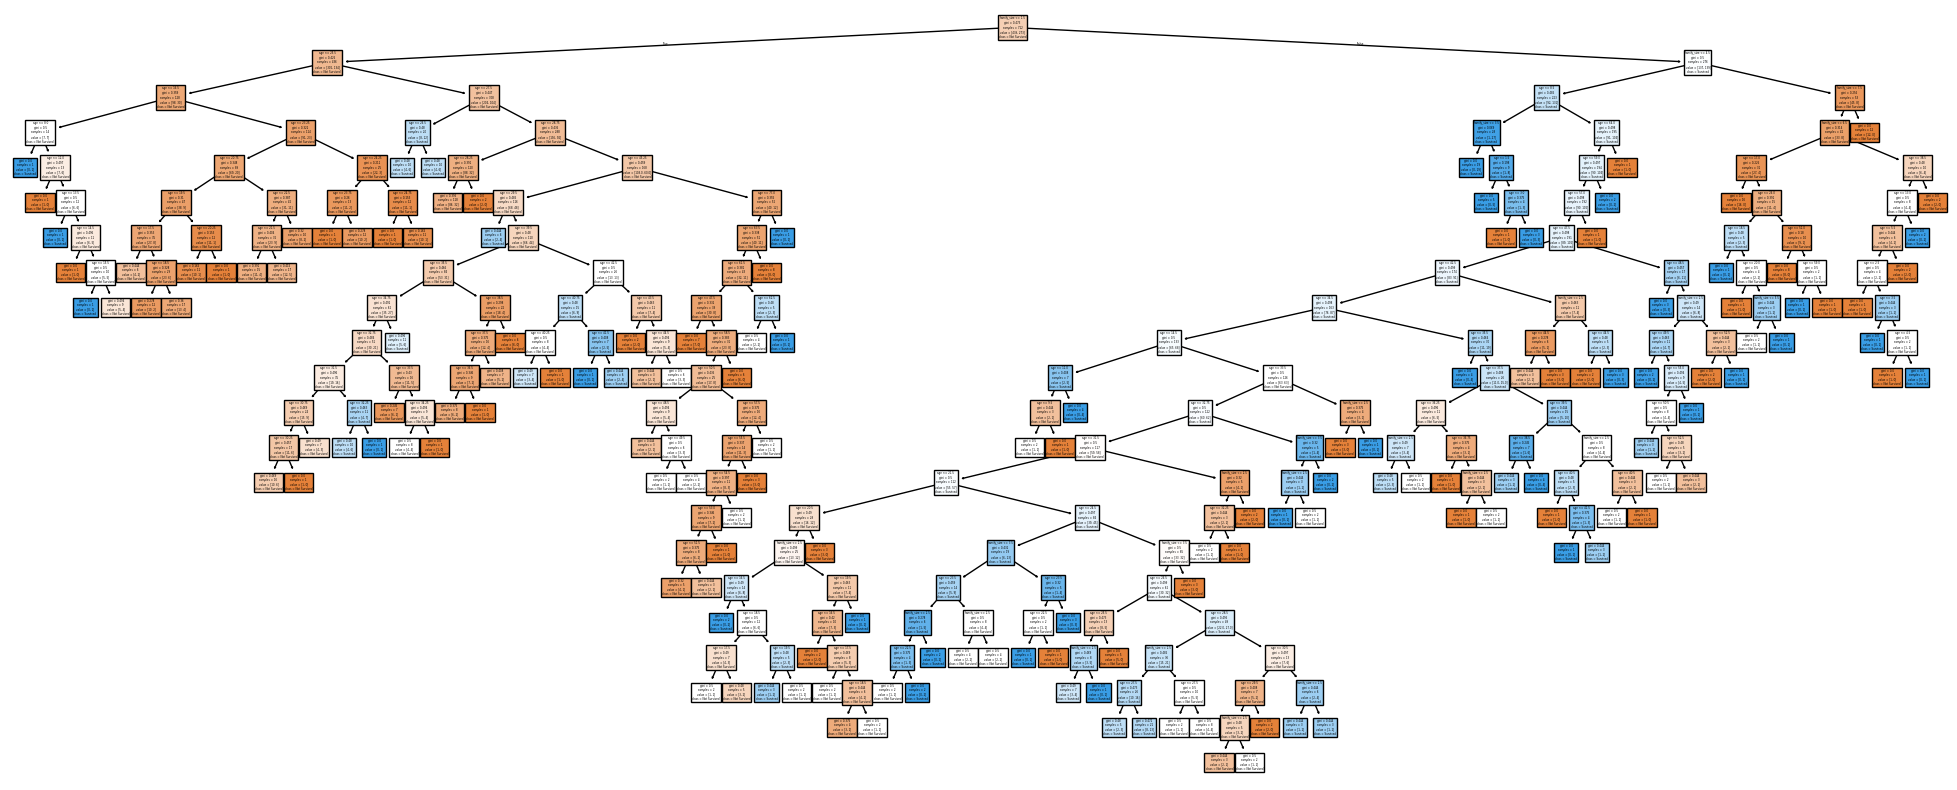

In [31]:
# Plot the decision tree model
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

### Reflection 4:
How well did the different cases perform?
* Case 1 (alone): 63% accuracy
* Case 2 (age): 61% accuracy
* Case 3 (age + family_size): 59% accuracy
  
Are there any surprising results?
* I thought that the combination of age and family_size would have the highest accuracy among the 3 cases.

Which inputs worked better? 
* Case 1, the alone feature, worked the best, then case 2 (age).

## Section 5. Compare Alternative Models (SVC, NN)
In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types
* RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
* Linear – Best for linearly separable data (straight line separation)
* Polynomial – Useful when the data follows a curved pattern
* Sigmoid – Similar to a neural network activation function; less common

Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

In [33]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
#svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC)
First, train an SVC model using the default kernel.

In [ ]:
# Case 1
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predict and evaluate the SVC model:

In [ ]:
# Case 1
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [41]:
# Case 2
svc_model = SVC()
svc_model.fit(X2_train, y2_train)
y2_pred_svc = svc_model.predict(X2_test)

print("Results for SVC on test data:")
print(classification_report(y2_test, y2_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [43]:
# Case 3
svc_model = SVC()
svc_model.fit(X3_train, y3_train)
y3_pred_svc = svc_model.predict(X3_test)

print("Results for SVC on test data:")
print(classification_report(y3_test, y3_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



Visualize Support Vectors
Create a scatter plot to visualize the support vectors. This helps understand how the SVM model separates the data.

Step-by-Step Process:

1) Split the data into two groups:
* Survived – Passengers who survived the Titanic sinking (value = 1).
* Not Survived – Passengers who did not survive (value = 0).

2) Create a scatter plot of these two groups using different colors and markers:
* Yellow squares ('s') for survived passengers
* Cyan triangles ('^') for non-survived passengers

3) Overlay the support vectors on top of the plot:
* Black pluses ('+') will represent the support vectors.
* Since the support vectors are plotted last, they appear on top of the data points and are not obscured.

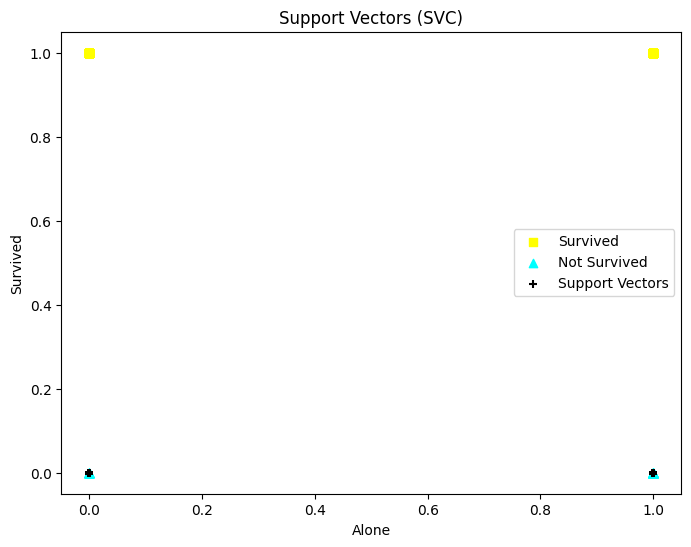

In [36]:
# Input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (NN MLP)
Train a neural network model:

In [ ]:
# Case 1
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

Predict and evaluate Neural Network model:

In [39]:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Plot confusion matrix:

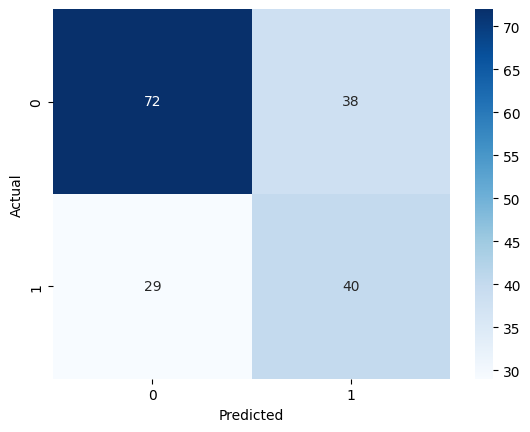

In [40]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       110
           1       0.80      0.06      0.11        69

    accuracy                           0.63       179
   macro avg       0.71      0.52      0.44       179
weighted avg       0.69      0.63      0.51       179



c:\Users\trent\Projects\applied-ml-trentrueckert\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


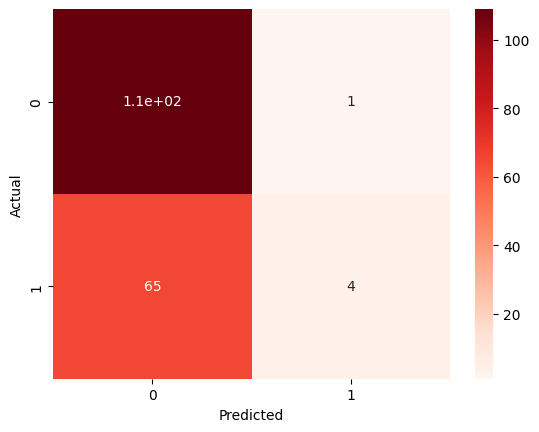

In [44]:
# Case 2
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X2_train, y2_train)
y2_pred_nn = nn_model.predict(X2_test)

print("Results for Neural Network on test data:")
print(classification_report(y2_test, y2_pred_nn))

cm_nn = confusion_matrix(y2_test, y2_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       110
           1       0.57      0.43      0.49        69

    accuracy                           0.65       179
   macro avg       0.63      0.61      0.61       179
weighted avg       0.64      0.65      0.64       179



c:\Users\trent\Projects\applied-ml-trentrueckert\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


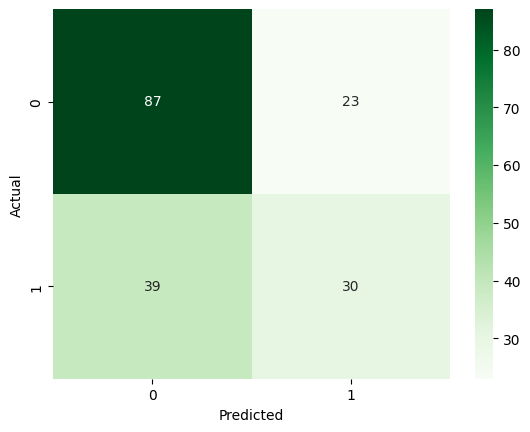

In [46]:
# Case 3
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X3_train, y3_train)
y3_pred_nn = nn_model.predict(X3_test)

print("Results for Neural Network on test data:")
print(classification_report(y3_test, y3_pred_nn))

cm_nn = confusion_matrix(y3_test, y3_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:
How well did each model perform?
* RBF Kernel had 63%, 61%, and 59% accuracy
* Neural Network had 63%, 63%, and 65% accuracy 

Are there any surprising results?
* No, I don't really know what I was expecting so I really couldn't be surprised

Why might one model outperform the others?
* It depends on how much data there is. Some models perform better with more data, and some perform better with less data.

## Section 6. Final Thoughts & Insights
### 6.1 Summarize Findings
What indicators are strong predictors of gender? 
* I believe 'sex' would be the strongest predictor.

Model Performance Comparison:

* Decision Tree: Performed well but showed signs of overfitting, as it achieved high accuracy on the training set but had slightly reduced generalizability on the test data.
* Neural Network: 
    * Case 1: 63% accuracy, but had lower precision.
    * Case 2: 63% accuracy, but had very low recall.
    * Case 3: 65% accuracy, with pretty moderate precision and recall.
* Best model: Case 3 of the neural network had the best overall performance including the best accuracy.


### 6.2 Discuss Challenges Faced
* Small sample size could limit generalizability with only 179 points in the test set.
* Missing values (if any) could bias the model.

### 6.3 Next Steps
* Test more features (e.g., BMI class).
* Try hyperparameter tuning for better results.

## Section 7. Summary Table
| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 51% | 58% | 54% | - |
|                   | Case 2 | age | 61% | 50% | 17% | 26% | - |
|                   | Case 3 | age + family_size | 59% | 46% | 35% | 40% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | alone | 63% | 51% | 58% | 54% | - |
|                    | Case 2 | age | 63% | 71% | 7% | 13% | - |
|                    | Case 3 | age + family_size | 63% | 71% | 7% | 13% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 63% | 51% | 58% | 54% | - |
|                    | Case 2 | age | 63% | 80% | 6% | 11% | - |
|                    | Case 3 | age + family_size | 65% | 57% | 43% | 49% | - |